# Este é um exemplo de como criar um bot de mensagens para uma lista gerada em uma tabela excel a partir de  [leads do google](https://ads.google.com/local-services-ads/).

Para esta tarefa são necessárias as bibliotecas:

* [Pandas](https://pandas.pydata.org/docs/)
* [Selenium](https://www.selenium.dev/selenium/docs/api/py/api.html)
* [Time](https://docs.python.org/3/library/time.html)
* [Urllib](https://docs.python.org/pt-br/3/library/urllib.html)

## Importando o arquivo de dados

In [10]:
import pandas as pd # importando a biblioteca pandas

leads_google = pd.read_excel('leads_google.xlsx') # lendo o arquivo
leads_google['Mensagem'] = 'Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.'

# censurando os números de telefone
leads_google['Telefone']=''

leads_google.style.set_properties(subset=['Mensagem'], **{'width': '300px'}) # comando para visualizar toda a coluna
                                                                             # Mensagem

,Nome,Telefone,Mensagem
0,Laura,,Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.
1,Renata,,Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.
2,Murilo,,Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.
3,João,,Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.
4,Pai,,Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.
5,Mãe,,Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.
6,Lucas,,Este é um teste de automatização de envio de mensagens para a Live! Intercâmbio.


Por questão de **segurança**, os números de telefone foram apagados.

In [11]:
# importando as bibliotecas para o bot

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import urllib

In [ ]:
nav = webdriver.Chrome() # abrindo o Google Chrome
nav.get('https://web.whatsapp.com/') 

while len(nav.find_elements_by_id('side')) < 1:
    time.sleep(1)
    
# já foi feito o login no whatsapp web

for i, mensagem in enumerate(leads_google['Mensagem']):
    nome = leads_google.loc[i, "Nome"]
    telefone = leads_google.loc[i, "Telefone"]
    texto = urllib.parse.quote(f'Oi {nome}! {mensagem}')
    time.sleep(2)
    link = f'https://web.whatsapp.com/send?phone={telefone}&text={texto}'
    time.sleep(2)
    nav.get(link) 
    while len(nav.find_elements_by_id('side')) < 1:
        time.sleep(3)
    nav.find_element_by_xpath('//*[@id="main"]/footer/div[1]/div[2]/div/div[1]/div/div[2]').send_keys(Keys.ENTER)
    time.sleep(10)


O comando ```nav.get('https://web.whatsapp.com/')```abre uma guia em seu computador já no site do whatsapp web.


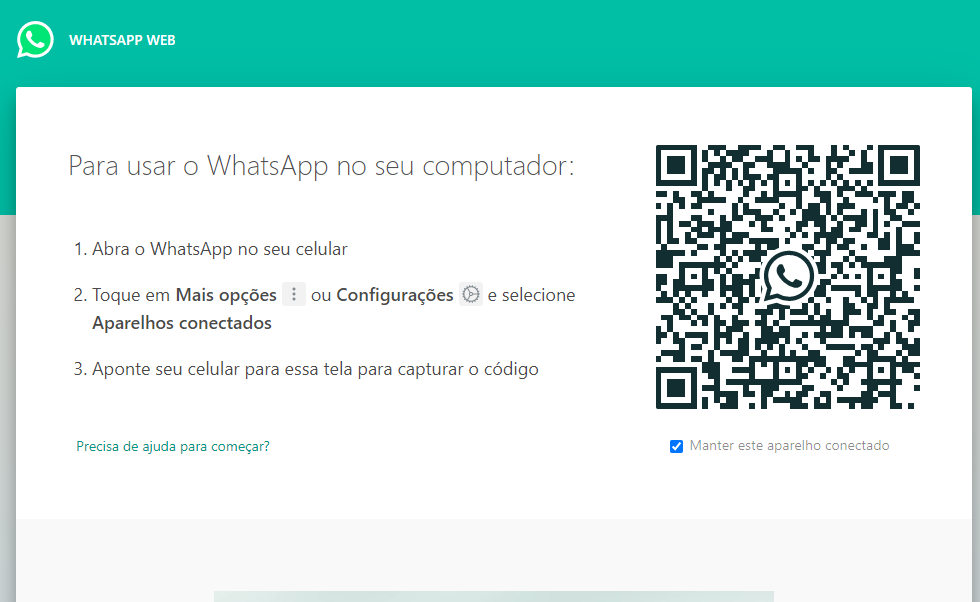

É necessário então que você **conecte o seu whatsapp** ao computador utilizado para a tarefa.

Após conectado, é preciso que o algoritmo aguarde por um período até que a página atualize, **se não o código resultará em erro**.

Por isso, utiliza-se o comando 
```python
    while len(nav.find_elements_by_id('side')) < 1:
        time.sleep(1) 
``` 
no qual ```nav.find_elements_by_id('side')``` gera uma lista de elementos no código fonte da página em que ```id = 'side'```. 

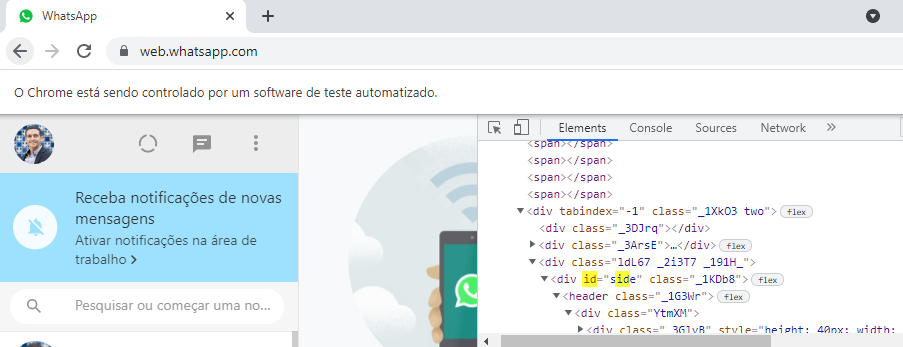

Enquanto a página não atualizar, o algoritmo não encontra o elemento procurado, fazendo com que o tamanho da lista seja zero. 

Com isso, o próximo comando não é executado até que a página atualize.

Após feito o login no whatsappweb, executa-se um ***for loop*** para o envio das mensagens: 

```python
for i, mensagem in enumerate(leads_google['Mensagem']):
    nome = leads_google.loc[i, "Nome"]                    # localiza a variável 'nome'
    telefone = leads_google.loc[i, "Telefone"]            # localiza a variável 'telefone'
    texto = urllib.parse.quote(f'Oi {nome}! {mensagem}')  
    time.sleep(2)
    link = f'https://web.whatsapp.com/send?phone={telefone}&text={texto}'
    time.sleep(2)
    nav.get(link) 
    while len(nav.find_elements_by_id('side')) < 1:
        time.sleep(3)
    nav.find_element_by_xpath('//*[@id="main"]/footer/div[1]/div[2]/div/div[1]/div/div[2]').send_keys(Keys.ENTER)
    time.sleep(10)
```

- O comando ```urllib.parse.quote(f'Oi {nome}! {mensagem}')``` codifica a mensagem no formato url, só assim é possível que o programa escreva a mensagem desejada em formato compreensível;

- Define-se então a variável ```link = f'https://web.whatsapp.com/send?phone={telefone}&text={texto}'``` para acessar o contato da tabela por meio do ```nav.get(link)```;

- Mais uma vez, esse procedimento demanda atualização da página, com isso é executado um novo ```while``` para que o código aguarde o tempo necessário antes de executar o próximo comando; 



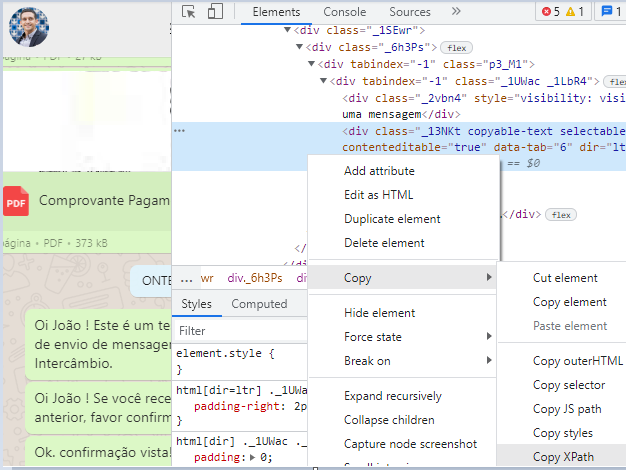

- Finalmente, temos o comando

```nav.find_element_by_xpath('//*[@id="main"]/footer/div[1]/div[2]/div/div[1]/div/div[2]').send_keys(Keys.ENTER)``` , 
o qual busca na página acessada o local de envio de mensagens e então aperta enter (```send_keys(Keys.ENTER)```) para enviá-la;
- Antes de enviar mensagem para o próximo contato, há um novo ```while()```, para aguardo da atualização da página, então o processo se repete.

# Referências

Este código foi criado com base no passo a passo exposto no vídeo da [Hashtag Treinamentos](https://www.youtube.com/watch?v=wrxrpC5Yeac&t=1150s). 

**Recomendo!!**